In [47]:
##### Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "WeatherPy/ouptut/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [48]:
#Generate Cities List



In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


635

In [50]:
#Perform API Calls


In [51]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | kloulklubed
Processing Record 5 of Set 1 | mount isa
Processing Record 6 of Set 1 | clarence town
Processing Record 7 of Set 1 | vao
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | sicamous
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | lavrentiya
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | frankenberg
Processing Record 19 of Set 1 | behshahr
Processing Record 20 of Set 1 | cap malheureux
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | sinnamary
Processing Record 

Processing Record 34 of Set 4 | barrow
Processing Record 35 of Set 4 | belyy yar
Processing Record 36 of Set 4 | bluff
Processing Record 37 of Set 4 | nuuk
Processing Record 38 of Set 4 | toyooka
Processing Record 39 of Set 4 | muli
Processing Record 40 of Set 4 | salalah
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | shingu
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | zvishavane
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | yarada
Processing Record 47 of Set 4 | alta floresta
Processing Record 48 of Set 4 | danville
Processing Record 49 of Set 4 | hue
Processing Record 0 of Set 5 | calvia
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | emerald
Processing Record 3 of Set 5 | malanje
Processing Record 4 of Set 5 | salina
Processing Record 5 of Set 5 | bengkulu
Processing Record 6 of Set 5 | barranca
Processing Record 7 of Set 5 | muisne
Processing Record 8 of Set 5 | mangaluru
Proces

Processing Record 29 of Set 8 | shenzhen
Processing Record 30 of Set 8 | katsuura
Processing Record 31 of Set 8 | merke
Processing Record 32 of Set 8 | ahuimanu
Processing Record 33 of Set 8 | teknaf
Processing Record 34 of Set 8 | nipawin
Processing Record 35 of Set 8 | takhtamygda
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | sarangani
Processing Record 38 of Set 8 | port macquarie
Processing Record 39 of Set 8 | panzhihua
Processing Record 40 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 41 of Set 8 | ilebo
Processing Record 42 of Set 8 | kalur kot
Processing Record 43 of Set 8 | petrovsk-zabaykalskiy
Processing Record 44 of Set 8 | sioux lookout
Processing Record 45 of Set 8 | coxim
Processing Record 46 of Set 8 | zafarwal
Processing Record 47 of Set 8 | gat
Processing Record 48 of Set 8 | zabaykalsk
Processing Record 49 of Set 8 | kanel
Processing Record 0 of Set 9 | indian head
Processing Record 1 of Set 9 | konibodom
Processing R

Processing Record 18 of Set 12 | kjollefjord
Processing Record 19 of Set 12 | crab hill
City not found. Skipping...
Processing Record 20 of Set 12 | lahat
Processing Record 21 of Set 12 | vestmanna
Processing Record 22 of Set 12 | inongo
Processing Record 23 of Set 12 | makinsk
Processing Record 24 of Set 12 | sorong
Processing Record 25 of Set 12 | juneau
Processing Record 26 of Set 12 | tayzhina
Processing Record 27 of Set 12 | lasa
Processing Record 28 of Set 12 | xixiang
Processing Record 29 of Set 12 | grindavik
Processing Record 30 of Set 12 | calama
Processing Record 31 of Set 12 | hervey bay
Processing Record 32 of Set 12 | atocha
Processing Record 33 of Set 12 | mrirt
City not found. Skipping...
Processing Record 34 of Set 12 | houma
Processing Record 35 of Set 12 | marquette
Processing Record 36 of Set 12 | itapirapua
Processing Record 37 of Set 12 | rostaq
City not found. Skipping...
Processing Record 38 of Set 12 | coihueco
Processing Record 39 of Set 12 | hobyo
Processing 

In [52]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [53]:
 # Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,34.30,95,97,10.40,CA,1651374730
1,rikitea,-23.1203,-134.9692,76.78,73,96,9.91,PF,1651374730
2,upernavik,72.7868,-56.1549,-0.72,75,7,7.07,GL,1651374731
3,kloulklubed,7.0419,134.2556,82.90,76,90,12.17,PW,1651374731
4,mount isa,-20.7333,139.5000,82.17,39,40,14.97,AU,1651374732


In [54]:
#Inspect the data and remove the cities where the humidity > 100%.


In [55]:
city_data_pd.describe() 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,19.666371,21.784289,61.594846,70.953925,56.921502,7.648584,1.651375e+09
std,33.077372,89.880071,19.002350,21.221492,39.635700,5.026493,1.095031e+02
min,-54.800000,-175.200000,-0.720000,1.000000,0.000000,0.000000,1.651374e+09
25%,-8.316625,-57.206850,47.892500,61.000000,16.250000,4.000000,1.651375e+09
50%,21.770950,27.880400,63.815000,76.000000,67.000000,6.390000,1.651375e+09
75%,47.236650,101.753225,77.242500,87.000000,100.000000,10.720000,1.651375e+09
max,78.218600,179.316700,98.560000,100.000000,100.000000,32.010000,1.651375e+09


In [109]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [110]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,34.30,95,97,10.40,CA,1651374730
1,rikitea,-23.1203,-134.9692,76.78,73,96,9.91,PF,1651374730
2,upernavik,72.7868,-56.1549,-0.72,75,7,7.07,GL,1651374731
3,kloulklubed,7.0419,134.2556,82.90,76,90,12.17,PW,1651374731
4,mount isa,-20.7333,139.5000,82.17,39,40,14.97,AU,1651374732


In [114]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

In [112]:
# Latitude vs. Temperature Plot


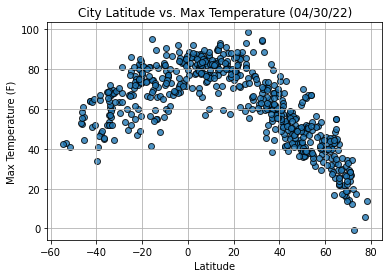

In [115]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

In [116]:
#Latitude vs. Humidity Plot


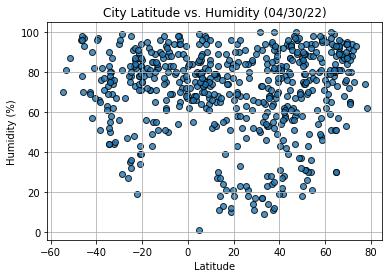

In [117]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

In [118]:
#Latitude vs. Cloudiness Plot


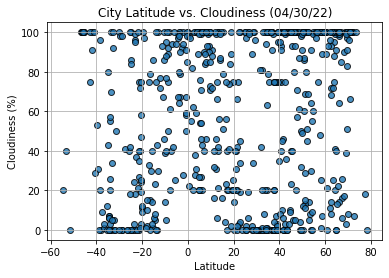

In [119]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

In [120]:
# Latitude vs. Wind Speed Plot


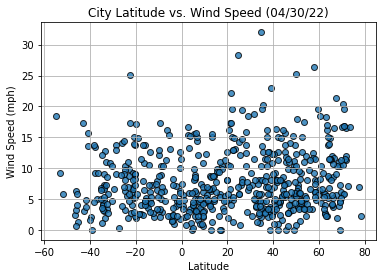

In [121]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [122]:
#Linear Regression


In [123]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [124]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

In [125]:
#Max Temp vs. Latitude Linear Regression


The r-value is: 0.7907024488889143


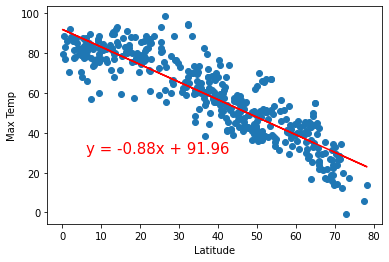

In [126]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.3939764769474649


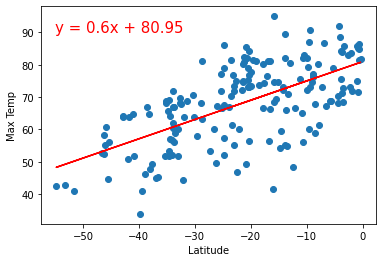

In [127]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

In [128]:
# Humidity (%) vs. Latitude Linear Regression


The r-value is: 0.01960986047151593


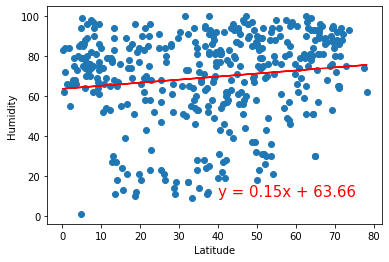

In [129]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.009795264434316489


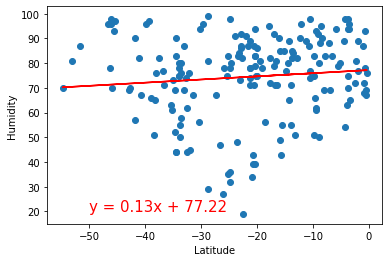

In [130]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

In [131]:
#Cloudiness (%) vs. Latitude Linear Regression


The r-value is: 0.0025998157019658367


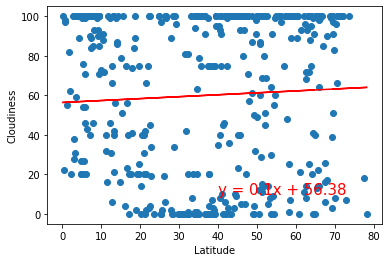

In [132]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.03995802556092592


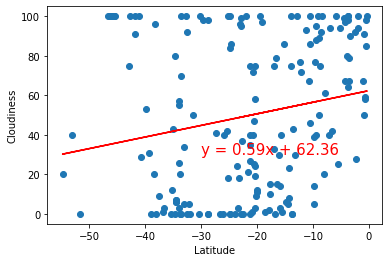

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))